In [27]:
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds 
tfds.disable_progress_bar()

In [28]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

In [29]:
encoder = info.features['text'].encoder

In [30]:
encoder

<SubwordTextEncoder vocab_size=8185>

In [31]:
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [35]:
next(iter(train_data))

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
 array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
        5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
           3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
          79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
          33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
          27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
          19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
         102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
           3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
           2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
         102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
          27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
          12,  258, 2306,   13,   91,   29,  171,   52,  229,    

In [38]:
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

In [42]:
a = next(iter(train_batches))
a

(<tf.Tensor: shape=(10, 539), dtype=int64, numpy=
 array([[4059, 3965,  112, ...,    0,    0,    0],
        [  62,    9,    1, ...,    0,    0,    0],
        [3475,  456,  143, ...,    0,    0,    0],
        ...,
        [4946,  127, 6573, ...,    0,    0,    0],
        [  62,   27,    9, ...,    0,    0,    0],
        [ 597,   11,    4, ...,   22,  220, 7962]])>,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1])>)

In [43]:
a[0].numpy()

array([[4059, 3965,  112, ...,    0,    0,    0],
       [  62,    9,    1, ...,    0,    0,    0],
       [3475,  456,  143, ...,    0,    0,    0],
       ...,
       [4946,  127, 6573, ...,    0,    0,    0],
       [  62,   27,    9, ...,    0,    0,    0],
       [ 597,   11,    4, ...,   22,  220, 7962]])

In [44]:
a[1].numpy()

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [45]:
embedding_dim = 16

model = keras.Sequential([
    layers.Embedding(encoder.vocab_size, embedding_dim),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [49]:
history = model.fit(
    train_batches,
    epochs=100,
    validation_data=train_batches,
    validation_steps=20
)

Epoch 1/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.1042 - accuracy: 0.9635 - val_loss: 0.1153 - val_accuracy: 0.9550
Epoch 2/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0949 - accuracy: 0.9686 - val_loss: 0.0399 - val_accuracy: 0.9900
Epoch 3/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0898 - accuracy: 0.9698 - val_loss: 0.0733 - val_accuracy: 0.9300
Epoch 4/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9719 - val_loss: 0.0679 - val_accuracy: 0.9700
Epoch 5/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9758 - val_loss: 0.0863 - val_accuracy: 0.9650
Epoch 6/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0738 - accuracy: 0.9762 - val_loss: 0.0791 - val_accuracy: 0.9650
Epoch 7/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0711 - accuracy: 0.9765 - val_loss: 0.0492 - val_ac

In [50]:
history

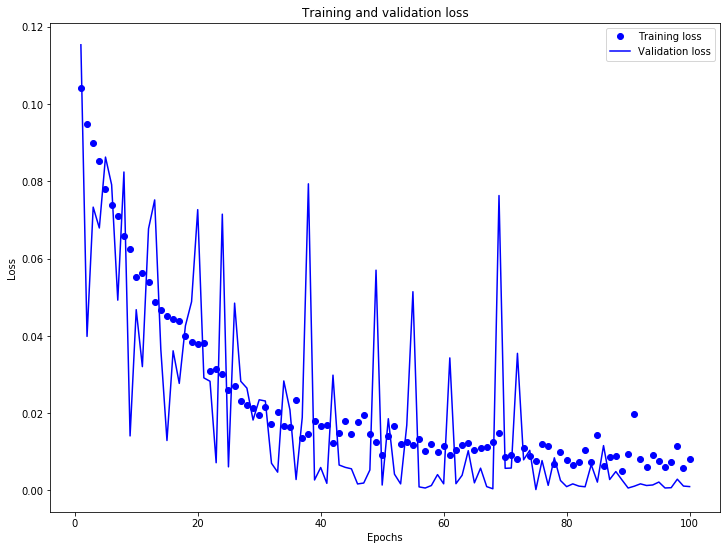

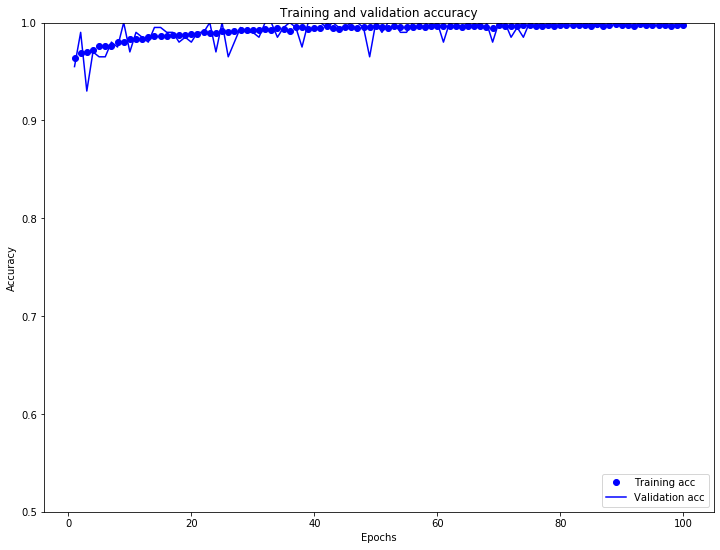

In [52]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [53]:
model.layers

In [54]:
model.layers[0]

In [55]:
e = model.layers[0]
weights = e.get_weights()[0]

In [56]:
weights

array([[-0.00034995, -0.03410898,  0.03658164, ...,  0.02794444,
        -0.00962034, -0.01291845],
       [-0.00639295, -0.0724193 , -0.062149  , ...,  0.21534914,
         0.00639351,  0.08108471],
       [-0.02430493,  0.07752199,  0.09758621, ..., -0.1385961 ,
        -0.01802835, -0.00759569],
       ...,
       [-0.0457614 ,  0.03184754, -0.0093134 , ...,  0.04405714,
         0.03060469,  0.01959688],
       [-0.0004076 ,  0.00368758, -0.01596838, ...,  0.03380476,
         0.00566845, -0.00718516],
       [ 0.04543593, -0.03668217,  0.00819317, ..., -0.04226266,
         0.03708738, -0.01977799]], dtype=float32)

In [57]:
weights.shape

(8185, 16)

In [58]:
import io 

encoder = info.features['text'].encoder

In [59]:
encoder

<SubwordTextEncoder vocab_size=8185>

In [62]:
out_v = io.open('vectors/vec.tsv', 'w', encoding='utf-8')
out_m = io.open('vectors/meta.tsv', 'w', encoding='utf-8')

In [63]:
for num, word in enumerate(encoder.subwords):
    vec = weights[num+1]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in vec]) + '\n')
out_v.close()
out_m.close()